# Gather metadata summary for NBI Digital Repository

This produces six charts and saves them to the website directory to be used on the documentation website

In [1]:
import os
import csv
import requests
import json as json
from pandas.io.json import json_normalize
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
#First find out how many records there are
#This returns 10 records but also says the total
r = requests.get('https://zenodo.org/api/records/?communities=nantucketbiodiversity')
n = json.loads(r.text)
total = n['hits']['total']
print(total)

36


In [3]:
# This url returns all information for the current number of records: 

r = requests.get('https://zenodo.org/api/records/?communities=nantucketbiodiversity&size='+str(total)+'&page=1')

#instructions: https://developers.zenodo.org/#records
# This does not return all the records
#r = requests.get('https://zenodo.org/api/records',
#                        params={'communities': 'nantucketbiodiversity',
#                                'access_token': 'ENTER KEY HERE'})

In [4]:
#Create Dictionary
m = json.loads(r.text)

In [5]:
#Save the json file if you want
with open('nbiRepository-'+str(datetime.datetime.now().strftime("%Y-%m-%d"))+'.json', "w") as write_file:
    json.dump(m, write_file)

The json file has 'aggregations' 'hits' and 'links'.  Aggregations is the basic summary information. Hits has all the metadata for each record.

In [6]:
hits = m['hits']['hits']

In [7]:
len(hits)

36

In [2]:
# Open previously saved json file
with open("nbiRepository-2020-07-10.json", "r") as read_file: #Replace this with the filename of your choice
    m = json.load(read_file)
hits = m['hits']['hits']

## Get some usage stats

In [8]:
print(hits[3]['stats']['unique_downloads'])


1.0


In [10]:
downloads = 0
views=0
for n in hits:
    dnld = n['stats']['unique_downloads']
    downloads += dnld
    vw = n['stats']['unique_views']
    views += vw

print('There have been',downloads,'unique downloads and',views,'unique views.')

There have been 185.0 unique downloads and 326.0 unique views.


## Create Lists of keywords and their counts

In [16]:
#First assemble the controlled vocabularies
groups = [
'amphibians and reptiles',
'bacteria',
'birds',
'fish',
'flora',
'fungi',
'invasive flora',
'invertebrates',
'mammals',
'marine fauna',
'non-vascular flora'
]
geographies = ['cape cod',
'global',
'martha\'s vineyard',
'massachusetts',
'muskeget',
'nantucket',
'national',
'new england coast',
'cape and islands',
'tuckernuck'
]
methods = ['acoustic sampling','amplicon sequencing','bait stations','banding','berlese funnel','bioblitz','camera trap',
'cover board','digital recording','genetic sequencing','emergence counts','field experiment',
'field observation','field sampling','garden experiment','geographic information system','ground penetrating radar',
'habitat monitoring','hand collection','health measurements','histology of adults',
'laboratory research','leaf collection','light trap','liquid mustard extraction','litter sorting',
'mist-netting','morphological observations','photography','pitfall traps',
'point count','quadrat sampling','remote sensing','remote tracking',
'soil samples','song recognition software','spat bags','spore density analysis','sweep net','tethering experiment',
'water samples'
]
studyTypes =['checklist',
'field survey',
'genetics study',
'management study'
'species comparison',
'species survey',
'population dynamics',
'population survey'
]
kingdoms = ['animalia',
'archeae',
'bacteria',
'chromista',
'fungi',
'plantae',
'protozoa'
]

In [12]:
#Parameters for charts
xlabel = 15
ylabel = 15
ticks = 12
titlesz = 20

In [13]:
#Get a list of keywords
list =[] #dim list as a empty list
for s in hits:
    list.append(s['metadata']['keywords'])

In [14]:
#key words are all comma separated sublists, get them into one full list
fulllist = []
for s in list:
    for t in s: #for each keyword in the sublist
        fulllist.append(t)

In [17]:
#Separate keywords using controlled vocabularies

#Group
matchset = set(groups)
group = [x for x in fulllist if x in matchset]

#Geography
matchset = set(geographies)
geography = [x for x in fulllist if x in matchset]

#Method
matchset = set(methods)
method = [x for x in fulllist if x in matchset]

#Study Type
matchset = set(studyTypes)
studyType = [x for x in fulllist if x in matchset]

#Kingdoms
matchset = set(kingdoms)
kingdom = [x for x in fulllist if x in matchset]


In [18]:
#Convert lists to dataframes

#Group
dfgroup = pd.DataFrame(group, columns=['group'])

#Geography
dfgeo = pd.DataFrame(geography, columns=['geography'])

#Method
dfmethod = pd.DataFrame(method, columns=['method'])

#Study Type
dftype = pd.DataFrame(studyType, columns=['type'])

#Kingdoms
dfking = pd.DataFrame(kingdom, columns=['kingdom'])



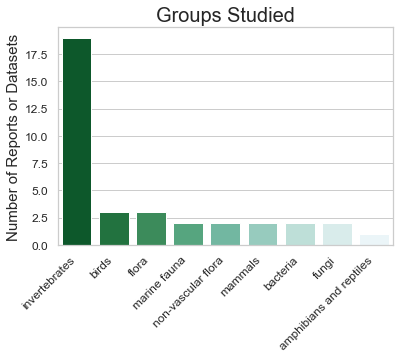

In [19]:
counts = dfgroup.group.value_counts() #uses matlibplot to count rows
dfgroupplt = pd.DataFrame({'chart':'Groups Studied','types':counts.index, 'count':counts.values}) #Converts the series to a dataframe
sns.set(style="whitegrid")
#Color palette options: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
ax = sns.barplot(x='types', y="count", data=dfgroupplt, palette='BuGn_r')
#ax.set(xlabel='Group', ylabel='Number of Reports or Datasets', fontsize=20)
#ax.set_title('Groups Studied')
ax.axes.set_title("Groups Studied",fontsize=titlesz)
ax.set_ylabel("Number of Reports or Datasets",fontsize=ylabel)
ax.set_xlabel("")
ax.tick_params(labelsize=ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig = ax.get_figure()
fig.savefig("../docs/assets/images/groups.png", bbox_inches = "tight")


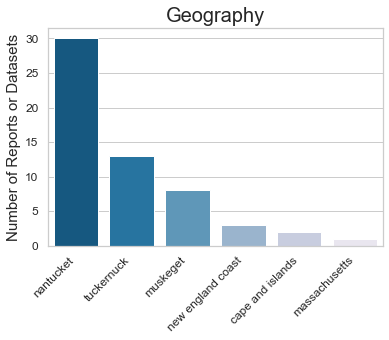

In [20]:
counts = dfgeo.geography.value_counts() #uses matlibplot to count rows
dfgeoplt = pd.DataFrame({'chart':'Geography','types':counts.index, 'count':counts.values}) #Converts the series to a dataframe
sns.set(style="whitegrid")
#Color palette options: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
ax = sns.barplot(x='types', y="count", data=dfgeoplt, palette='PuBu_r')
#ax.set(xlabel='Group', ylabel='Number of Reports or Datasets', fontsize=20)
#ax.set_title('Groups Studied')
ax.axes.set_title("Geography",fontsize=titlesz)
ax.set_ylabel("Number of Reports or Datasets",fontsize=ylabel)
ax.set_xlabel("")
ax.tick_params(labelsize=ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig = ax.get_figure()
fig.savefig("../docs/assets/images/geography.png", bbox_inches = "tight")


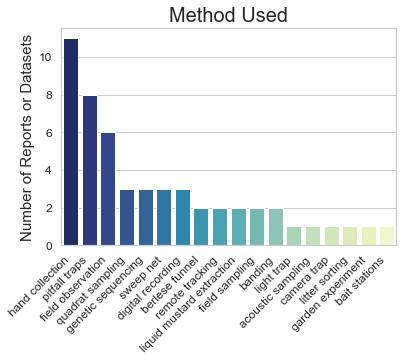

In [21]:
counts = dfmethod.method.value_counts() #uses matlibplot to count rows
dfmethodplt = pd.DataFrame({'chart':'Method Used','types':counts.index, 'count':counts.values}) #Converts the series to a dataframe
sns.set(style="whitegrid")
#Color palette options: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
ax = sns.barplot(x='types', y="count", data=dfmethodplt, palette='YlGnBu_r')
#ax.set(xlabel='Group', ylabel='Number of Reports or Datasets', fontsize=20)
#ax.set_title('Groups Studied')
ax.axes.set_title("Method Used",fontsize=titlesz)
ax.set_ylabel("Number of Reports or Datasets",fontsize=ylabel)
ax.set_xlabel("")
ax.tick_params(labelsize=ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig = ax.get_figure()
fig.savefig("../docs/assets/images/method.png", bbox_inches = "tight")


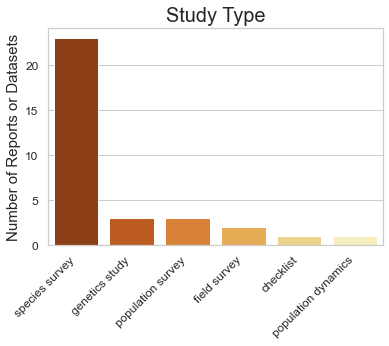

In [22]:
counts = dftype.type.value_counts() #uses matlibplot to count rows
dftypeplt = pd.DataFrame({'chart':'Study Types','types':counts.index, 'count':counts.values}) #Converts the series to a dataframe
sns.set(style="whitegrid")
#Color palette options: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
ax = sns.barplot(x='types', y="count", data=dftypeplt, palette='YlOrBr_r')
#ax.set(xlabel='Group', ylabel='Number of Reports or Datasets', fontsize=20)
#ax.set_title('Groups Studied')
ax.axes.set_title("Study Type",fontsize=titlesz)
ax.set_ylabel("Number of Reports or Datasets",fontsize=ylabel)
ax.set_xlabel("")
ax.tick_params(labelsize=ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig = ax.get_figure()
fig.savefig("../docs/assets/images/types.png", bbox_inches = "tight")


## Type of file stats

In [23]:
stats=m['aggregations']['file_type']['buckets']

In [24]:
list = []
for s in stats:
    list.append(s)
print(list)
#This is a list of dictionaries

[{'doc_count': 33, 'key': 'pdf'}, {'doc_count': 9, 'key': 'csv'}, {'doc_count': 1, 'key': 'r'}]


In [25]:
# Convert to a dataframe
dfstats = pd.DataFrame(list)
dfstats['chart'] = 'File Types' #This is used later to chart everything in one figure
dfstats.columns = ['count','types','chart']
dfstats.head()

,count,types,chart
0,33,pdf,File Types
1,9,csv,File Types
2,1,r,File Types


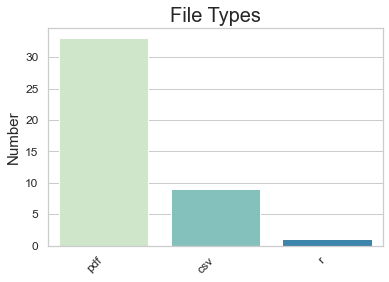

In [26]:
sns.set(style="whitegrid")
#Color palette options: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
ax = sns.barplot(x='types', y="count", data=dfstats, palette='GnBu')
#ax.set(xlabel='Group', ylabel='Number of Reports or Datasets', fontsize=20)
#ax.set_title('Groups Studied')
ax.axes.set_title("File Types",fontsize=titlesz)
ax.set_ylabel("Number",fontsize=ylabel)
ax.set_xlabel("")
ax.tick_params(labelsize=ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig = ax.get_figure()
fig.savefig("../docs/assets/images/files.png", bbox_inches = "tight")

## Get Upload Type

In [27]:
stats2=m['aggregations']['type']['buckets']

In [28]:
lst = []
for s in stats2:
    lst.append(s)
print(lst)

[{'doc_count': 26, 'key': 'publication', 'subtype': {'buckets': [{'doc_count': 26, 'key': 'report'}], 'doc_count_error_upper_bound': 0, 'sum_other_doc_count': 0}}, {'doc_count': 10, 'key': 'dataset', 'subtype': {'buckets': [], 'doc_count_error_upper_bound': 0, 'sum_other_doc_count': 0}}]


In [29]:
#Get a list of main upload types and then delete the publication one (the next block gets the various types of pubs)
#All the following operations are occurring on stats because these are dictionaries.  They have to be done in this order.
#If you remove the subtypes too early, you can't get the detail from publications.

lst = []
for s in stats2:
    lst.append(s)
#Delete publication
for i in range(len(lst)): 
    if lst[i]['key'] == 'publication': 
        del lst[i]
        break


print(lst)
#This is a list of dictionaries

[{'doc_count': 10, 'key': 'dataset', 'subtype': {'buckets': [], 'doc_count_error_upper_bound': 0, 'sum_other_doc_count': 0}}]


In [30]:
#Adds the publication types

for s in stats2:
    if s['key'] == 'publication':
        for t in s['subtype']['buckets']:
            lst.append(t)

In [31]:
print(lst)

[{'doc_count': 10, 'key': 'dataset', 'subtype': {'buckets': [], 'doc_count_error_upper_bound': 0, 'sum_other_doc_count': 0}}, {'doc_count': 26, 'key': 'report'}]


In [32]:
#Delete any 'subtypes'

for n in lst:
    try:
        del n['subtype']
    except KeyError:
        pass
print(lst)

[{'doc_count': 10, 'key': 'dataset'}, {'doc_count': 26, 'key': 'report'}]


In [33]:
# Convert to a dataframe
dfstats2 = pd.DataFrame(lst)
dfstats2['chart'] = 'Upload Types' #This is used later to chart everything in one figure
dfstats2.columns = ['count','types','chart']
dfstats2.head()

,count,types,chart
0,10,dataset,Upload Types
1,26,report,Upload Types


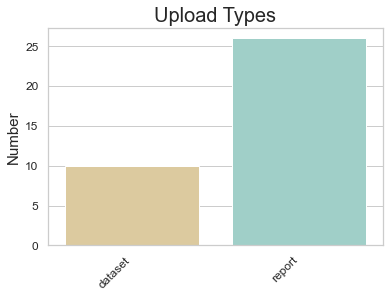

In [34]:
sns.set(style="whitegrid")
#Color palette options: https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
ax = sns.barplot(x='types', y="count", data=dfstats2, palette='BrBG')
#ax.set(xlabel='Group', ylabel='Number of Reports or Datasets', fontsize=20)
#ax.set_title('Groups Studied')
ax.axes.set_title("Upload Types",fontsize=titlesz)
ax.set_ylabel("Number",fontsize=ylabel)
ax.set_xlabel("")
ax.tick_params(labelsize=ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig = ax.get_figure()
fig.savefig("../docs/assets/images/upload.png", bbox_inches = "tight")

In [ ]:
#One way to get visualizations to the web: https://www.freecodecamp.org/news/how-to-create-auto-updating-data-visualizations-in-python-with-matplotlib-and-aws/
